# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [4]:
# importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [ ]:
X.head()

In [ ]:
y.head()

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
#verificando se existe alguma variavel do tipo object ou se possui algum valor NA

boston.info()

Sao 506 entradas, todas no formato numerico e nenhuma possui dados faltantes. Tudo certo com a base para o scikitlearn.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [ ]:
correlation_matrix = boston.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlações")
plt.show()

Analisando a matriz de correlações algumas variaveis apresentam um certo potencial preditivo. Selecionei todas as variaveis que possuem uma correlaçao superior a 0,45, sendo elas: 'lstat', 'ptratio', 'tax', 'rm', 'indus'.

### 3. Separe os dados em validação e teste

In [2]:
#Separando os dados em treino e teste em uma faixa de 70% e 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [3]:
#criando e treinando as duas arvores

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [6]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))


template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 33,64
O MSE da árvore com profundidade=8 é: 31,64


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
# A arvore com a profundidade = 8 é mais adequada por aprensentar um MSE menor.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

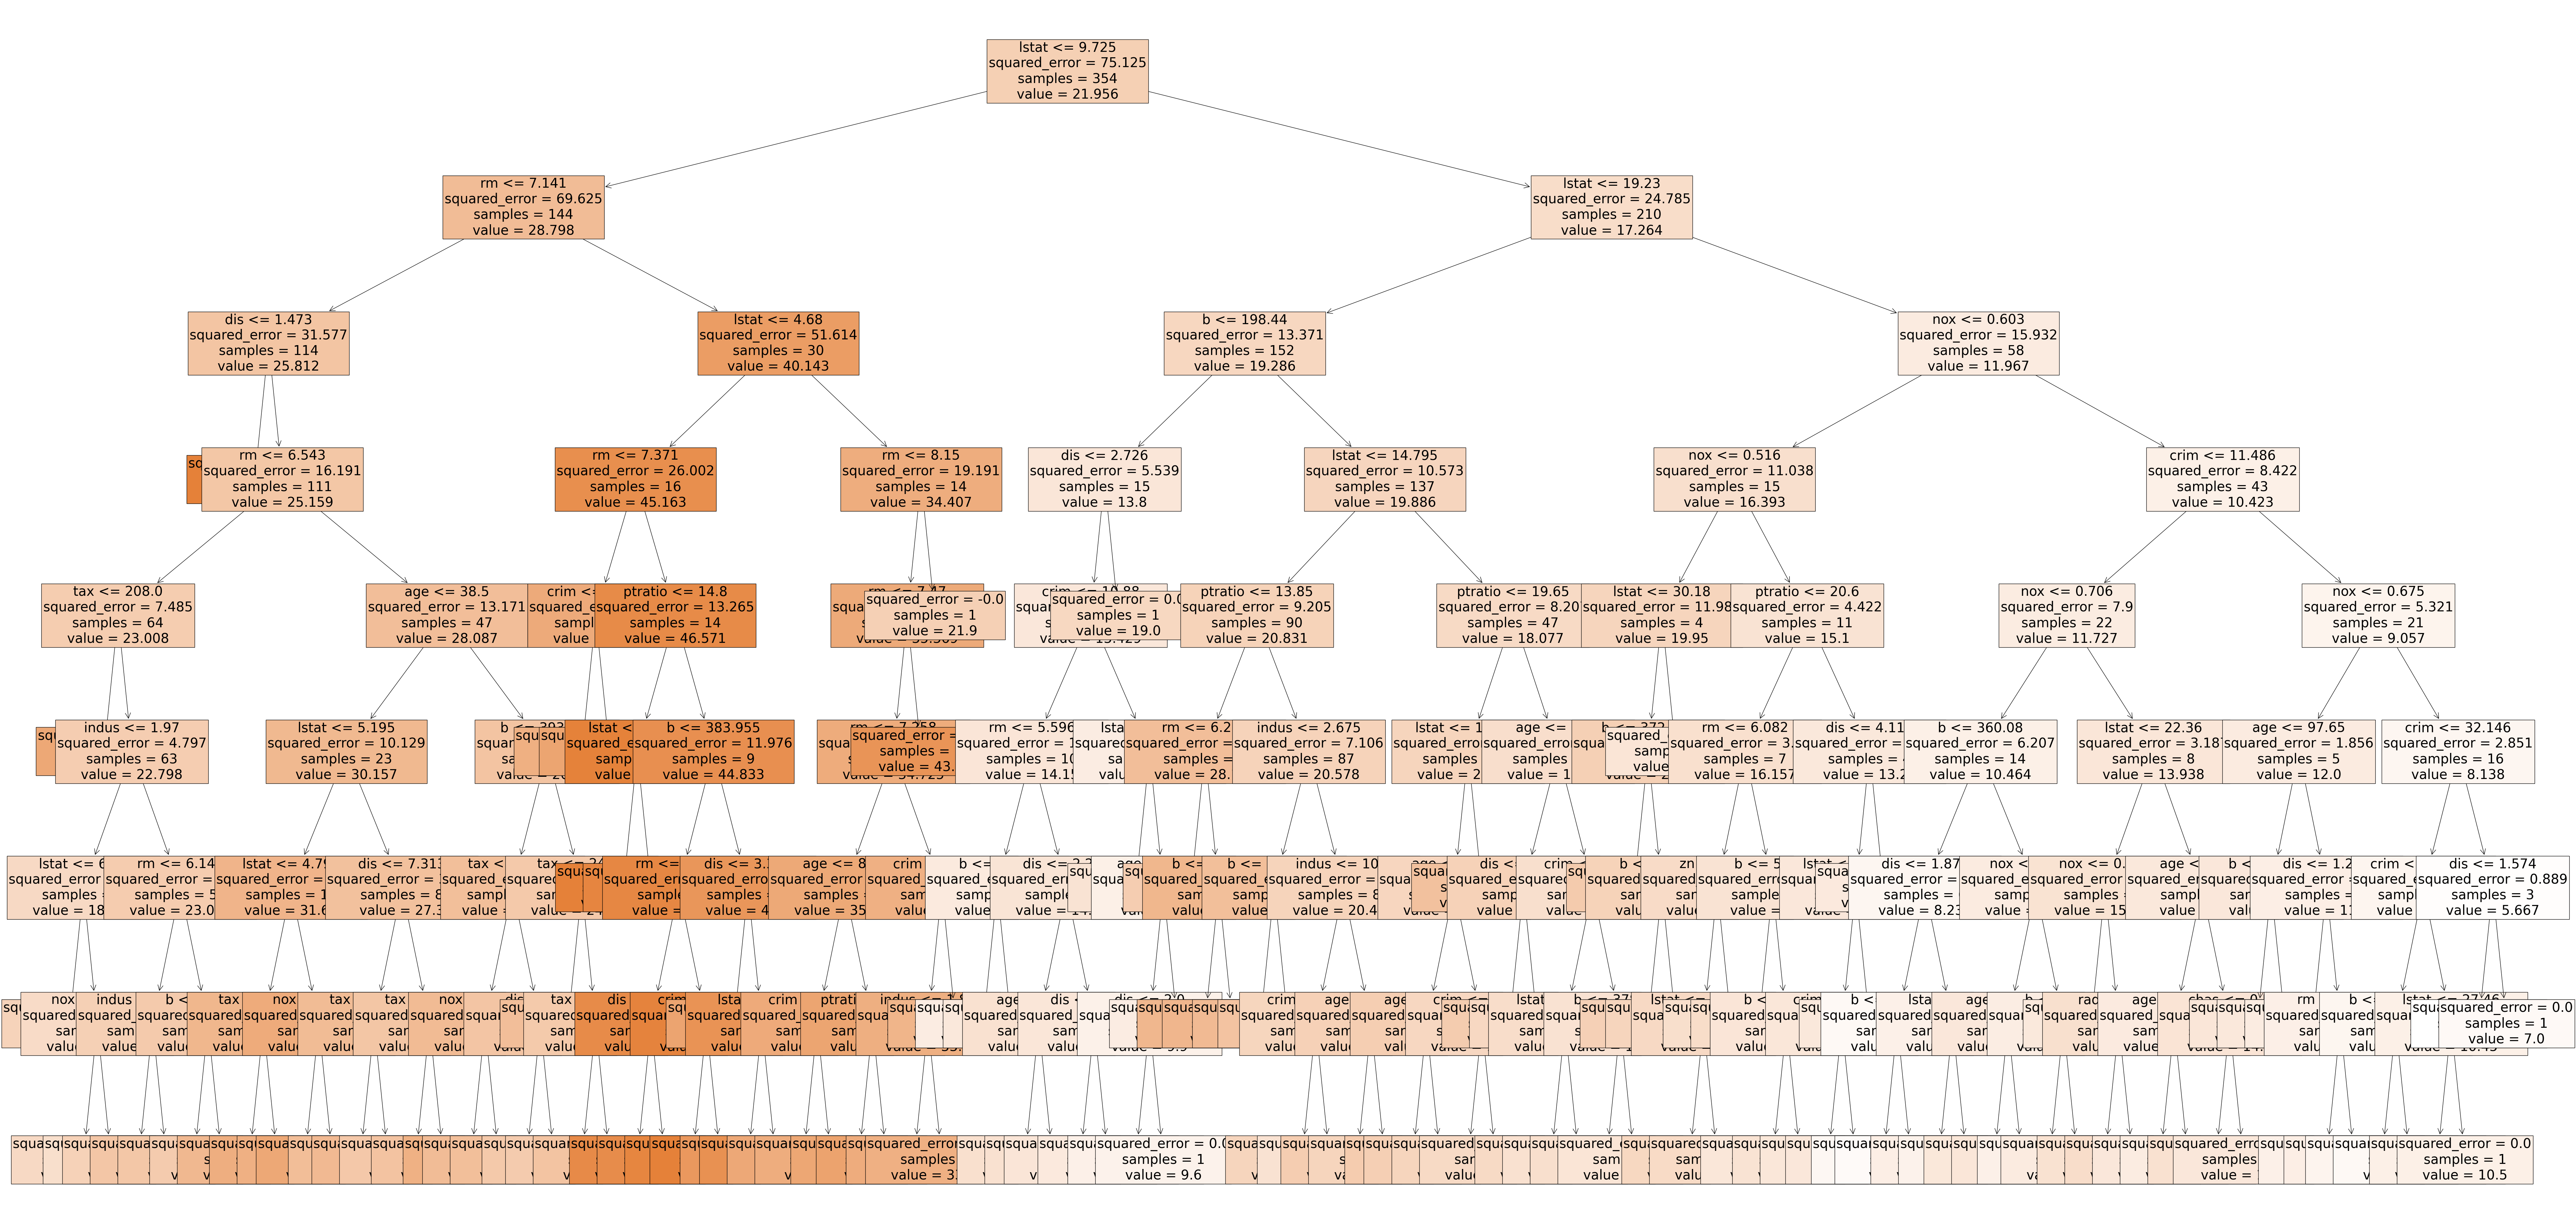

In [13]:
#Visualizando a arvore 

plt.rc('figure', figsize=(100, 50))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,
                    fontsize=30,
                    filled=True) 

A variavel mais importante é a variavel presente no nó raiz: 'lstat'.